<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Contagem-de-Status-por-Pedido" data-toc-modified-id="Contagem-de-Status-por-Pedido-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Contagem de Status por Pedido</a></span></li><li><span><a href="#Compras-por-Ano,-Mês-e-Dia-da-Semana" data-toc-modified-id="Compras-por-Ano,-Mês-e-Dia-da-Semana-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compras por Ano, Mês e Dia da Semana</a></span><ul class="toc-item"><li><span><a href="#Por-Estado" data-toc-modified-id="Por-Estado-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Por Estado</a></span></li></ul></li><li><span><a href="#Tempo-Médio-de-Aprovação" data-toc-modified-id="Tempo-Médio-de-Aprovação-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Tempo Médio de Aprovação</a></span><ul class="toc-item"><li><span><a href="#Por-Tipo-de-Pagamento" data-toc-modified-id="Por-Tipo-de-Pagamento-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Por Tipo de Pagamento</a></span></li><li><span><a href="#Por-Estado-do-Cliente" data-toc-modified-id="Por-Estado-do-Cliente-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Por Estado do Cliente</a></span></li></ul></li><li><span><a href="#Tempo-Médio-de-Postagem" data-toc-modified-id="Tempo-Médio-de-Postagem-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tempo Médio de Postagem</a></span><ul class="toc-item"><li><span><a href="#Por-Estado-do-Cliente" data-toc-modified-id="Por-Estado-do-Cliente-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Por Estado do Cliente</a></span></li></ul></li><li><span><a href="#Tipo-de-Pagamento" data-toc-modified-id="Tipo-de-Pagamento-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Tipo de Pagamento</a></span></li><li><span><a href="#Quantidade-de-Parcelas" data-toc-modified-id="Quantidade-de-Parcelas-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Quantidade de Parcelas</a></span></li><li><span><a href="#Vendas-em-Cidades-de-SP" data-toc-modified-id="Vendas-em-Cidades-de-SP-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Vendas em Cidades de SP</a></span></li></ul></li></ul></div>

Neste notebook, iremos trabalhar em cima de múltiplos conjuntos de dados contendo informações a respeito do E-Commerce no Brasil. Os dados públicos levandados pela empres **Olist** agrupam aproximadamentee 100.000 pedidos on-line (e anônimos) dispostos em 8 diferentes datasets. O grande objetivo deste notebook é analisar os dados contidos nestes conjuntos e realizar análises que possam descrever o comportamento deste tipo de relação comercial, respondendo perguntas de acordo com o andamento do projeto. [Kaggle-Brazilian-e-commerce](https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv)

## Lendo os Dados

In [1]:
# Importando bibliotecas
import pandas as pd
import os

# Verificando quantos datasets temos em mãos
for filename in os.listdir():
    if '.csv' in filename:
        print(filename)

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [2]:
# Lendo datasets
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [3]:
# Verificando colunas de cada um dos datasets
dataframes = {
    'Customers': df_customers,
    'Geolocation': df_geolocation,
    'Orders': df_orders,
    'Items': df_items,
    'Payments': df_payments,
    'Reviews': df_reviews,
    'Products': df_products,
    'Sellers': df_sellers
}

for df_name, df in dataframes.items():
    print(f'{df_name}')
    print(f'{list(df.columns)}\n')

Customers
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_wid

## EDA

Vamos iniciar o processo de Análise Exploratória respondendo algumas perguntas:    

### Contagem de Status por Pedido

In [4]:
# Verificando cabeçalho do dataset de pedidos
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Verificando status dos pedidos
df_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Compras por Ano, Mês e Dia da Semana

In [6]:
# Verificando tipos primitivos
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [7]:
# Convertendo colunas em timestamp
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
             'order_delivered_customer_date', 'order_estimated_delivery_date']
for t in time_cols:
    df_orders[t] = pd.to_datetime(df_orders[t])

In [8]:
# Verificando novos tipos primitivos
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [9]:
# Testando
df_orders['order_purchase_timestamp'][0]

Timestamp('2017-10-02 10:56:33')

In [10]:
# Criando nova coluna para ano
df_orders['order_purchase_year'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.year)

# Criando nova coluna para mês
df_orders['order_purchase_month'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.month)

In [11]:
# Verificando por ano
df_orders['order_purchase_year'].value_counts()

2018    54011
2017    45101
2016      329
Name: order_purchase_year, dtype: int64

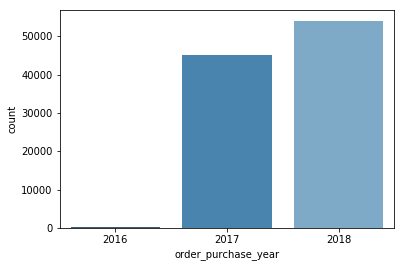

In [12]:
# Plotando
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

fig, ax = plt.subplots()
ax = sns.countplot(x='order_purchase_year', data=df_orders, palette='Blues_d')

    Verificar em quanto % cresceram as vendas de 2017 para 2018

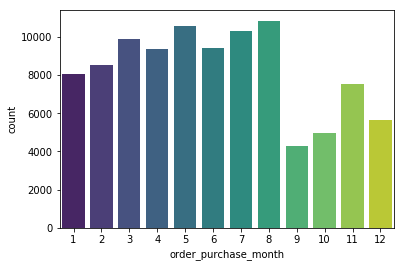

In [13]:
# Verificando por mês
fig, ax = plt.subplots()
ax = sns.countplot(x='order_purchase_month', data=df_orders, paldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZUAAAELCAYAAAARNxsIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAGIpJREFUeJzt3X20XXV95/H3R/AJFQGJDhI0qBlHdHygWYAPdVGxitQRdKQLqzUqldZBRUer0Naioi6stj5UZRYVBBwrMohCHStkRfGhSiQgz0hJRSESIQqioxUb/c4f+3f1EG6SS/Lb9+aS92uts87ev/Pb+/vbJzf3c/fe5+ydqkKSpB7uMdcDkCTdfRgqkqRuDBVJUjeGiiSpG0NFktSNoSJJ6sZQkSR1Y6hIkroxVCRJ3Ww/1wOYbbvuumstWrRorochSfPGRRdd9MOqWjCTvttcqCxatIiVK1fO9TAkad5I8r2Z9vXwlySpG0NFktSNoSJJ6sZQkSR1Y6hIkroxVCRJ3RgqkqRuDBVJUjeGiiSpm23uG/WS7mzfj/7VKOtd8SfvGGW92nq5pyJJ6sZQkSR1Y6hIkroxVCRJ3XiiXvPSk486bpT1fuMDbxllvdK2wj0VSVI3hookqRtDRZLUjaEiSerGE/XSVugJ73nrKOu99M/HWa80xT0VSVI3o4VKkpOT3Jzkiom2XZIsS3Jte965tSfJB5OsSnJZkr0nllna+l+bZOlE++8kubwt88EkGWtbJEkzM+aeyinAgeu1HQ0sr6rFwPI2D/AcYHF7HAGcAEMIAccC+wL7AMdOBVHrc8TEcuvXkiTNstFCpaq+AtyyXvPBwKlt+lTgkIn202pwAbBTkt2AZwPLquqWqroVWAYc2F7bsaq+UVUFnDaxLknSHJntcyoPqao1AO35wa19d+CGiX6rW9vG2ldP0y5JmkNby4n66c6H1Ga0T7/y5IgkK5OsXLt27WYOUZK0KbMdKje1Q1e055tb+2pgj4l+C4EbN9G+cJr2aVXViVW1pKqWLFiwYIs3QpI0vdn+nso5wFLg+PZ89kT7q5OcznBS/raqWpPkXOBdEyfnnwUcU1W3JPlpkv2AFcBLgb+fzQ3Z2h343982ynq/8OljR1mvpLuH0UIlySeB/YFdk6xm+BTX8cAZSQ4HrgcObd0/DxwErAJ+DrwcoIXHccCFrd/bq2rq5P+rGD5hdl/gn9tDkjSHRguVqnrRBl46YJq+BRy5gfWcDJw8TftK4HFbMkZJUl9by4l6SdLdgKEiSerGUJEkdWOoSJK6MVQkSd0YKpKkbrxJlzQDe79lnC+TXnycXybV3Yuhoi72f8Vxo6z3/JPfMsp6JY3Dw1+SpG4MFUlSN4aKJKkbQ0WS1I2hIknqxlCRJHVjqEiSujFUJEndGCqSpG4MFUlSN4aKJKkbQ0WS1I2hIknqxlCRJHVjqEiSuvF+KrPkufsfPdq6P3f+8aOtW5LuCvdUJEndGCqSpG4MFUlSN4aKJKkbQ0WS1M2chEqS1ye5MskVST6Z5D5J9kyyIsm1ST6V5F6t773b/Kr2+qKJ9RzT2q9J8uy52BZJ0m/Neqgk2R14LbCkqh4HbAccBrwbeF9VLQZuBQ5vixwO3FpVjwLe1/qRZK+23GOBA4GPJNluNrdFknRHc3X4a3vgvkm2B3YA1gDPAM5sr58KHNKmD27ztNcPSJLWfnpV3V5V1wGrgH1mafySpGnM+pcfq+r7Sd4LXA/8O3AecBHw46pa17qtBnZv07sDN7Rl1yW5DXhQa79gYtWTy2zSgY9+5ZZsxkZ94Zp/GG3dkrQ1m4vDXzsz7GXsCTwUuB/wnGm61tQiG3htQ+3T1TwiycokK9euXXvXBy1JmpG5OPz1TOC6qlpbVf8BnAU8BdipHQ4DWAjc2KZXA3sAtNcfCNwy2T7NMndQVSdW1ZKqWrJgwYLe2yNJauYiVK4H9kuyQzs3cgBwFfAl4IWtz1Lg7DZ9Tpunvf7FqqrWflj7dNiewGLgm7O0DZKkaczFOZUVSc4ELgbWAd8CTgT+L3B6kne0tpPaIicBH0+yimEP5bC2niuTnMEQSOuAI6vqV7O6MZKkO5iTqxRX1bHAses1f4dpPr1VVb8ADt3Aet4JvLP7ACVJm8Vv1EuSujFUJEndGCqSpG4MFUlSN95OWJI6+sjXXzDauv/HU84abd29uKciSerGUJEkdWOoSJK6MVQkSd0YKpKkbgwVSVI3hookqRtDRZLUjaEiSerGUJEkdWOoSJK6MVQkSd0YKpKkbgwVSVI3hookqRtDRZLUjaEiSerGUJEkdWOoSJK6MVQkSd0YKpKkbgwVSVI3MwqVJMtn0iZJ2rZtv7EXk9wH2AHYNcnOQNpLOwIPHXlskqR5ZqOhAvwp8DqGALmI34bKT4APjzguSdI8tNHDX1X1garaE3hjVT2iqvZsjydU1Yc2t2iSnZKcmeTbSa5O8uQkuyRZluTa9rxz65skH0yyKsllSfaeWM/S1v/aJEs3dzySpD42tacCQFX9fZKnAIsml6mq0zaz7geAL1TVC5Pci+EQ218Ay6vq+CRHA0cDbwaeAyxuj32BE4B9k+wCHAssAQq4KMk5VXXrZo5JkrSFZhQqST4OPBK4BPhVay7gLodKkh2BpwMvA6iqXwK/THIwsH/rdipwPkOoHAycVlUFXND2cnZrfZdV1S1tvcuAA4FP3tUxSZL6mFGoMOwN7NV+sW+pRwBrgY8leQLDuZqjgIdU1RqAqlqT5MGt/+7ADRPLr25tG2q/kyRHAEcAPOxhD+uwCZKk6cz0eypXAP+pU83tgb2BE6rqScDPGA51bUimaauNtN+5serEqlpSVUsWLFhwV8crSZqhme6p7ApcleSbwO1TjVX1vM2ouRpYXVUr2vyZDKFyU5Ld2l7KbsDNE/33mFh+IXBja99/vfbzN2M8kqROZhoqb+1VsKp+kOSGJI+uqmuAA4Cr2mMpcHx7Prstcg7w6iSnM5yov60Fz7nAu6Y+JQY8Czim1zglSXfdTD/99eXOdV8DfKJ98us7wMsZDsWdkeRw4Hrg0Nb388BBwCrg560vVXVLkuOAC1u/t0+dtJckzY2Zfvrrp/z2fMW9gHsCP6uqHTenaFVdwnDyf30HTNO3gCM3sJ6TgZM3ZwySpP5muqfygMn5JIcA+4wyIknSvDXTcyp3UFWfbV9QlCTNoWUr9h1t3b+/74pNd1rPTA9/vWBi9h789lvskiT9xkz3VP7bxPQ64LsM33SXJOk3ZnpO5eVjD0SSNP/N9CZdC5N8JsnNSW5K8ukkC8cenCRpfpnpZVo+xvAlxIcyXF/rn1qbJEm/MdNQWVBVH6uqde1xCuBFtCRJdzDTUPlhkpck2a49XgL8aMyBSZLmn5mGyiuAPwR+AKwBXki7XIokSVNm+pHi44ClU3dVbHddfC9D2EiSBMx8T+Xxk7fpbRdufNI4Q5IkzVczDZV7TFxifmpPZbMu8SJJuvuaaTD8LfD1JGcyXJ7lD4F3jjYqSdK8NNNv1J+WZCXwDIbb+L6gqq4adWSS1MEbvjTtnTO6+Nvf+/Bo656vZnwIq4WIQSJJ2qCZnlORJGmTDBVJUjeGiiSpG0NFktSNoSJJ6sZQkSR1Y6hIkroxVCRJ3RgqkqRuDBVJUjeGiiSpGy9fL2nWPf8zbxplvZ95/t+Msl7NnHsqkqRu5ixUkmyX5FtJPtfm90yyIsm1ST6V5F6t/d5tflV7fdHEOo5p7dckefbcbIkkacpc7qkcBVw9Mf9u4H1VtRi4FTi8tR8O3FpVjwLe1/qRZC/gMOCxwIHAR5JsN0tjlyRNY05CJclC4A+Aj7b5MNwA7MzW5VTgkDZ9cJunvX5A638wcHpV3V5V1wGrgH1mZwskSdOZqz2V9wNvAn7d5h8E/Liq1rX51cDubXp34AaA9vptrf9v2qdZ5g6SHJFkZZKVa9eu7bkdkqQJsx4qSZ4L3FxVF002T9O1NvHaxpa5Y2PViVW1pKqWLFiw4C6NV5I0c3PxkeKnAs9LchBwH2BHhj2XnZJs3/ZGFgI3tv6rgT2A1Um2Bx4I3DLRPmVyGUnSHJj1PZWqOqaqFlbVIoYT7V+sqhcDXwJe2LotBc5u0+e0edrrX6yqau2HtU+H7QksBr45S5shSZrG1vTlxzcDpyd5B/At4KTWfhLw8SSrGPZQDgOoqiuTnAFcBawDjqyqX83+sCVJU+Y0VKrqfOD8Nv0dpvn0VlX9Ajh0A8u/E3jneCOUJN0VfqNektSNoSJJ6sZQkSR1Y6hIkroxVCRJ3RgqkqRuDBVJUjeGiiSpG0NFktSNoSJJ6sZQkSR1Y6hIkroxVCRJ3RgqkqRuDBVJUjeGiiSpG0NFktSNoSJJ6sZQkSR1Y6hIkroxVCRJ3RgqkqRuDBVJUjeGiiSpG0NFktSNoSJJ6sZQkSR1Y6hIkroxVCRJ3cx6qCTZI8mXklyd5MokR7X2XZIsS3Jte965tSfJB5OsSnJZkr0n1rW09b82ydLZ3hZJ0h3NxZ7KOuANVfUYYD/gyCR7AUcDy6tqMbC8zQM8B1jcHkcAJ8AQQsCxwL7APsCxU0EkSZobsx4qVbWmqi5u0z8FrgZ2Bw4GTm3dTgUOadMHA6fV4AJgpyS7Ac8GllXVLVV1K7AMOHAWN0WStJ45PaeSZBHwJGAF8JCqWgND8AAPbt12B26YWGx1a9tQuyRpjsxZqCS5P/Bp4HVV9ZONdZ2mrTbSPl2tI5KsTLJy7dq1d32wkqQZmZNQSXJPhkD5RFWd1Zpvaoe1aM83t/bVwB4Tiy8EbtxI+51U1YlVtaSqlixYsKDfhkiS7mAuPv0V4CTg6qr6u4mXzgGmPsG1FDh7ov2l7VNg+wG3tcNj5wLPSrJzO0H/rNYmSZoj289BzacCfwxcnuSS1vYXwPHAGUkOB64HDm2vfR44CFgF/Bx4OUBV3ZLkOODC1u/tVXXL7GyCJGk6sx4qVfU1pj8fAnDANP0LOHID6zoZOLnf6CRJW8Jv1EuSujFUJEndGCqSpG4MFUlSN4aKJKkbQ0WS1I2hIknqxlCRJHVjqEiSujFUJEndGCqSpG4MFUlSN4aKJKkbQ0WS1I2hIknqxlCRJHVjqEiSujFUJEndGCqSpG4MFUlSN4aKJKkbQ0WS1I2hIknqxlCRJHVjqEiSujFUJEndGCqSpG4MFUlSN4aKJKmbeR8qSQ5Mck2SVUmOnuvxSNK2bF6HSpLtgA8DzwH2Al6UZK+5HZUkbbvmdagA+wCrquo7VfVL4HTg4DkekyRts+Z7qOwO3DAxv7q1SZLmQKpqrsew2ZIcCjy7qv6kzf8xsE9VvWa9fkcAR7TZRwPXbEa5XYEfbsFwt9Za1rOe9badeptb6+FVtWAmHbffjJVvTVYDe0zMLwRuXL9TVZ0InLglhZKsrKolW7KOrbGW9axnvW2n3mzUmu+Hvy4EFifZM8m9gMOAc+Z4TJK0zZrXeypVtS7Jq4Fzge2Ak6vqyjkeliRts+Z1qABU1eeBz89CqS06fLYV17Ke9ay37dQbvda8PlEvSdq6zPdzKpKkrYihshFJTk5yc5IrZqneHkm+lOTqJFcmOWrkevdJ8s0kl7Z6bxuz3kTd7ZJ8K8nnZqHWd5NcnuSSJCtnod5OSc5M8u327/jkEWs9um3X1OMnSV43Yr3Xt5+TK5J8Msl9xqrV6h3Val05xnZN9/87yS5JliW5tj3vPHK9Q9v2/TpJ109lbaDee9rP5mVJPpNkp541wVDZlFOAA2ex3jrgDVX1GGA/4MiRLztzO/CMqnoC8ETgwCT7jVhvylHA1bNQZ8rvVdUTZ+ljmx8AvlBV/wV4AiNuZ1Vd07bricDvAD8HPjNGrSS7A68FllTV4xg+GHPYGLVavccBr2S4asYTgOcmWdy5zCnc+f/30cDyqloMLG/zY9a7AngB8JWOdTZWbxnwuKp6PPCvwDG9ixoqG1FVXwFumcV6a6rq4jb9U4ZfSKNdIaAG/6/N3rM9Rj3JlmQh8AfAR8esMxeS7Ag8HTgJoKp+WVU/nqXyBwD/VlXfG7HG9sB9k2wP7MA03wnr6DHABVX186paB3wZeH7PAhv4/30wcGqbPhU4ZMx6VXV1VW3Ol7E3t9557f0EuIDhu31dGSpbqSSLgCcBK0aus12SS4CbgWVVNWo94P3Am4Bfj1xnSgHnJbmoXVlhTI8A1gIfa4f3PprkfiPXnHIY8MmxVl5V3wfeC1wPrAFuq6rzxqrH8Bf805M8KMkOwEHc8YvOY3lIVa2B4Y884MGzUHOuvAL4594rNVS2QknuD3waeF1V/WTMWlX1q3b4ZCGwTzvsMIokzwVurqqLxqoxjadW1d4MV7I+MsnTR6y1PbA3cEJVPQn4GX0Pn0yrffH3ecD/GbHGzgx/xe8JPBS4X5KXjFWvqq4G3s1wuOYLwKUMh4fVQZK/ZHg/P9F73YbKVibJPRkC5RNVddZs1W2Hac5n3HNITwWel+S7DFeUfkaS/z1iParqxvZ8M8P5hn1GLLcaWD2xt3cmQ8iM7TnAxVV104g1nglcV1Vrq+o/gLOAp4xYj6o6qar2rqqnMxzGuXbMes1NSXYDaM83z0LNWZVkKfBc4MU1wndKDJWtSJIwHI+/uqr+bhbqLZj69EeS+zL84vj2WPWq6piqWlhVixgO13yxqkb7azfJ/ZI8YGoaeBbDYZVRVNUPgBuSPLo1HQBcNVa9CS9ixENfzfXAfkl2aD+nBzDyhy2SPLg9P4zhZPbY2wjDZZ6WtumlwNmzUHPWJDkQeDPwvKr6+ShFqsrHBh4MP8RrgP9g+Cv08JHrPY3hHMBlwCXtcdCI9R4PfKvVuwL461l8b/cHPjdyjUcwHDa5FLgS+MtZ2K4nAivbe/pZYOeR6+0A/Ah44Cxs29sY/ui4Avg4cO+R632VIZQvBQ4YYf13+v8NPIjhU1/XtuddRq73/DZ9O3ATcO7I9VYx3C5k6vfL/+r9vvqNeklSNx7+kiR1Y6hIkroxVCRJ3RgqkqRuDBVJUjeGiiSpG0NFd1tJXpbkQ3M9jg1Jsmi2bqswtrYtfzQxv1W/9xqPoaK7hQy26Oe5XX23u7HWu5VZBPzRpjrp7s9Q0byR5H+2mzZdkeR17a/jq5N8BLgY2CPJy5P8a5IvM1xrbGrZBUk+neTC9nhqa39rkhOTnAectoG6L0tydpIvJLkmybGt/Q57GknemOStbfr8JO9q4zgqyUPaTZEubY+p62Ztl+Qf2o2azmuXyyHJK9s4L23j3qG1H9q2/9IkX2lt27WbL13Ybr70pxt5D/dP8uUkZ7T36fgkL85ws7bLkzyy9Xt4kuVtfcvbpVJIckqSDyb5epLvJHlhW/XxwO9muFnY61vbQ9t7dm2Sv5npv7PmubEv7eDDR48Hw02oLgfuB9yf4bIrT2K4hP5+rc9uDNeoWgDcC/gX4EPttX8EntamH8ZwfTWAtwIXAffdSO2XMVzu4kHAfRkuU7KE4a/zKyb6vRF4a5s+H/jIxGufYrjqNAw3uHpgW34d8MTWfgbwkjb9oIll3wG8pk1fDuzepndqz0cAf9Wm781wmZg9N7At+wM/bu/VvYHvA29rrx0FvL9N/xOwtE2/Avhsmz6F4WrI9wD2AlZNrPdz671n32nbeR/ge8Aec/1z5GP8h3sqmi+eBnymqn5Ww43FzgJ+F/heVV3Q+uwLnF/DlXR/yfCLfMozgQ9luHfMOcCOUxebBM6pqn/fRP1lVfWj1u+sNp5Nmaz/DOAE+M3tBm5r7ddV1SVt+iKGoAF4XJKvJrkceDHw2Nb+L8ApSV7JEE4wXCjzpW3bVjCE38buknhhDTeEux34N2DqviiXT9R/MkMQw3Cdr8nt/WxV/bqqrgIespE6y6vqtqr6BcM1vB6+kb66m9gWjvXq7iEbaP/ZevMbupjdPYAnrx8ewwV377SO6ay/3mLYy5j8w2z9e7bPZL23T0z/imFPCIY9gkOq6tIkL2PYE6Cq/izJvgx3z7wkyRMZ3pvXVNW5M6i3fs1fT8z/mg3/Tpjc/snlN/Tvsn6/X21k3bobcU9F88VXgEPapdfvx3B116+u12cFsH+GuwXeEzh04rXzgFdPzbRfxnfF7yfZpZ3zOIRhj+Em4MGt3r0Z7lGxIcuBV7Xa22W49fDGPABY07bjxRPjfmRVraiqvwZ+yHA3xHOBV7W+JPnP2fI7Tn6d396D/sXA1zbR/6dtzNrG+ZeD5oWqujjJKcA3W9NHgVvX67OmnSj/BsM5kIv57SGi1wIfTnIZw8/9V4A/uwtD+BrDYaBHAf9YVSsBkrydIcyuY+P3ojkKODHJ4Qx/tb+qjXFD3tLW+z2Gw1JTv7Dfk2Qxwx7CcobLwl/GcNjq4gy7XmvZ8nurvxY4Ocmft/W9fBP9LwPWJbmUYS/r1o13192Vl76XNqEdflpSVa/eVF9pW+fhL0lSN+6pSE2SZwPvXq/5uqp6/lyMZ0sk+a8Mh+sm3V5V+87FeLTtMFQkSd14+EuS1I2hIknqxlCRJHVjqEiSujFUJEnd/H+pq6/yXa7P/AAAAABJRU5ErkJggg==ette='viridis')

In [14]:
df_orders_grouped = \
df_orders.groupby(['order_purchase_year', 'order_purchase_month'], as_index=False).count()
df_orders_2016 = df_orders_grouped[df_orders_grouped['order_purchase_year']==2016]
df_orders_2017 = df_orders_grouped[df_orders_grouped['order_purchase_year']==2017]
df_orders_2018 = df_orders_grouped[df_orders_grouped['order_purchase_year']==2018]


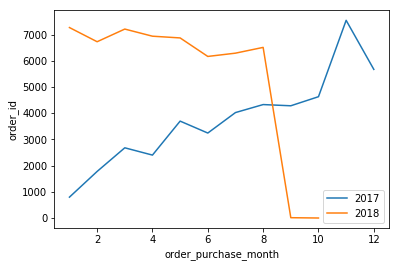

In [15]:
# Comportamento por ano
#ax = sns.lineplot(x='order_purchase_month', y='order_id', data=df_orders_2016, palette='viridis')
ax = sns.lineplot(x='order_purchase_month',y='order_id', 
                  data=df_orders_2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='order_id', data=df_orders_2018, 
                  label='2018')

suprimir valores a partir do mês 9 em 2018.. Possibilidade: prever essas vendas usando regressao

In [16]:
# Criando nova coluna para dia da semana
df_orders['order_purchase_dayofweek'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

# Verificando
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,1


In [17]:
# Mapeando para dias da semana
day_of_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_dayofweek'].map(day_of_week)

# Verificando
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Sat
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Tue


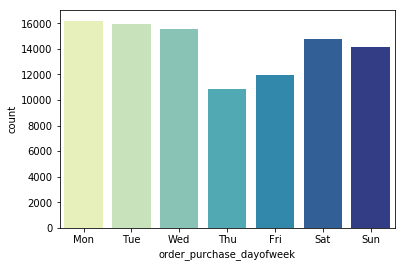

In [18]:
# Plotando
import numpy as np
fig, ax = plt.subplots()
ax = sns.countplot(x='order_purchase_dayofweek', data=df_orders, palette='YlGnBu')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

#### Por Estado

In [19]:
df_ord_cust = df_orders.merge(df_customers, on='customer_id', how='inner')

# Primeiras linhas
df_ord_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Sat,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Tue,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [20]:
df_grouped = df_ord_cust.groupby('customer_state', as_index=False).count().sort_values('order_id', ascending=False)
df_grouped

,customer_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,customer_unique_id,customer_zip_code_prefix,customer_city
25,SP,41746,41746,41746,41746,41667,40858,40495,41746,41746,41746,41746,41746,41746,41746
18,RJ,12852,12852,12852,12852,12832,12658,12353,12852,12852,12852,12852,12852,12852,12852
10,MG,11635,11635,11635,11635,11619,11432,11355,11635,11635,11635,11635,11635,11635,11635
22,RS,5466,5466,5466,5466,5456,5382,5344,5466,5466,5466,5466,5466,5466,5466
17,PR,5045,5045,5045,5045,5038,4954,4923,5045,5045,5045,5045,5045,5045,5045
23,SC,3637,3637,3637,3637,3631,3577,3547,3637,3637,3637,3637,3637,3637,3637
4,BA,3380,3380,3380,3380,3378,3327,3256,3380,3380,3380,3380,3380,3380,3380
6,DF,2140,2140,2140,2140,2137,2110,2080,2140,2140,2140,2140,2140,2140,2140
7,ES,2033,2033,2033,2033,2031,2014,1995,2033,2033,2033,2033,2033,2033,2033
8,GO,2020,2020,2020,2020,2018,1989,1957,2020,2020,2020,2020,2020,2020,2020


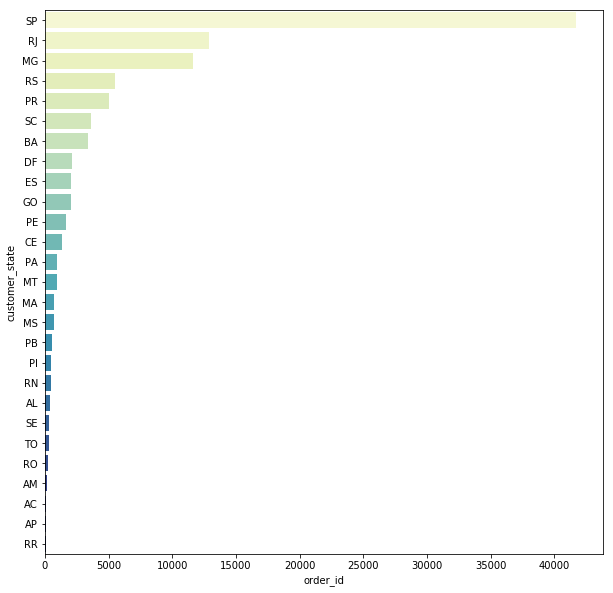

In [21]:
# Credit amount byb purpose
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='order_id', y='customer_state', data=df_grouped, ci=None, 
            palette="YlGnBu")
plt.show()

### Tempo Médio de Aprovação

In [22]:
compra = df_orders['order_purchase_timestamp'][0]
approv = df_orders['order_approved_at'][0]

print(compra)
print(approv)

2017-10-02 10:56:33
2017-10-02 11:07:15


In [23]:
approv - compra

Timedelta('0 days 00:10:42')

In [24]:
# Criando nova coluna
df_orders['time_for_approving'] = \
df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']

# Verificando
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,0 days 00:10:42
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,1 days 06:42:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,0 days 00:16:34
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Sat,0 days 00:17:53
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Tue,0 days 01:01:50


In [25]:
type(df_orders['time_for_approving'][0])

pandas._libs.tslib.Timedelta

In [26]:
df_orders_and_payments = df_orders.merge(df_payments, on='order_id', how='inner')
df_orders_and_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,0 days 00:10:42,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,0 days 00:10:42,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,0 days 00:10:42,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,1 days 06:42:50,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,0 days 00:16:34,1,credit_card,3,179.12


In [27]:
sample = df_orders['time_for_approving'][0]
sample

Timedelta('0 days 00:10:42')

In [28]:
sample.total_seconds()

642.0

In [29]:
# Convertendo timedelta em segundos
df_orders_and_payments['time_for_approving'] = \
df_orders_and_payments['time_for_approving'].apply(lambda x: x.total_seconds())
df_orders_and_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,642.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,642.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,642.0,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,110570.0,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,994.0,1,credit_card,3,179.12


#### Por Tipo de Pagamento

In [30]:
# Agrupando
df_payment_type_grouped = \
df_orders_and_payments.groupby(['payment_type'], as_index=False).mean()

df_payment_type_grouped = df_payment_type_grouped.loc[:, ['payment_type', 'time_for_approving']]

In [31]:
# Verificando
df_payment_type_grouped = df_payment_type_grouped.iloc[[0, 1, 2, 4], :]

df_payment_type_grouped

,payment_type,time_for_approving
0,boleto,119249.229422
1,credit_card,16553.934062
2,debit_card,34350.240026
4,voucher,31086.734751


In [32]:
df_payment_type_grouped['time_for_approving'] = \
df_payment_type_grouped['time_for_approving'].apply(lambda x: x/3600) # Em Horas
df_payment_type_grouped

,payment_type,time_for_approving
0,boleto,33.124786
1,credit_card,4.598315
2,debit_card,9.541733
4,voucher,8.635204


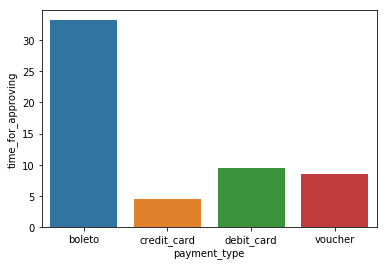

In [33]:
ax = sns.barplot(x='payment_type', y='time_for_approving', data=df_payment_type_grouped)

#### Por Estado do Cliente

In [34]:
df_ord_pay_cust = df_orders_and_payments.merge(df_customers, on='customer_id', how='inner')
print(f'\nDimensão da união orders and payments: {df_orders_and_payments.shape}')
print(f'Dimensão da união ord pay and costumers: {df_ord_pay_cust.shape}')

# Primeiras linhas
df_ord_pay_cust.head()


Dimensão da união orders and payments: (103886, 16)
Dimensão da união ord pay and costumers: (103886, 20)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,642.0,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,642.0,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,642.0,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,110570.0,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,994.0,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [35]:
df = df_ord_pay_cust.drop_duplicates(subset='order_id', keep='first')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,642.0,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,110570.0,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,994.0,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Sat,1073.0,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Tue,3710.0,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [36]:
df_g=df.groupby(['customer_state'], as_index=False).mean()\
.sort_values('time_for_approving', ascending=False)
df_g['time_for_approving'] = df_g['time_for_approving'].apply(lambda x: x/3600) # transforma em horas
df_g.head()

,customer_state,order_purchase_year,order_purchase_month,time_for_approving,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix
21,RR,2017.521739,5.239130,27.440779,1.000000,2.739130,218.796087,69309.434783
3,AP,2017.573529,5.455882,15.352782,1.014706,2.647059,237.589706,68910.044118
0,AC,2017.333333,6.160494,15.023707,1.000000,3.654321,235.399136,69914.604938
14,PB,2017.511194,6.162313,13.953379,1.033582,3.843284,255.780951,58273.382463
9,MA,2017.471218,6.052209,13.892428,1.009371,3.128514,201.847631,65336.518072


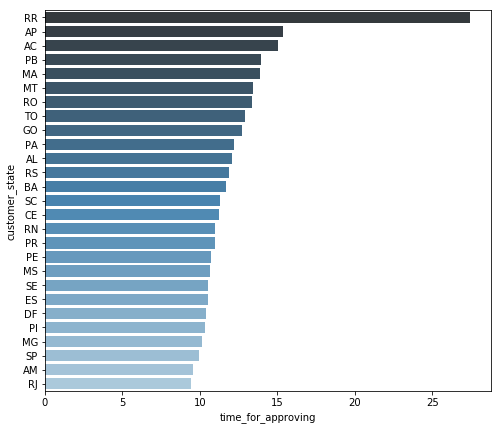

In [37]:
fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.barplot(x='time_for_approving', y='customer_state', data=df_g, palette='Blues_d')

### Tempo Médio de Postagem

In [38]:
df_orders.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_carrier_date      datetime64[ns]
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
order_purchase_year                        int64
order_purchase_month                       int64
order_purchase_dayofweek                  object
time_for_approving               timedelta64[ns]
dtype: object

In [39]:
compra = df_orders['order_purchase_timestamp'][0]
approv = df_orders['order_approved_at'][0]
post = df_orders['order_delivered_carrier_date'][0]

print(compra)
print(approv)
print(post)

# Criando nova coluna
df_orders['time_for_posting'] = \
df_orders['order_delivered_carrier_date'] - df_orders['order_purchase_timestamp']

# Verificando
df_orders.head()

2017-10-02 10:56:33
2017-10-02 11:07:15
2017-10-04 19:55:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving,time_for_posting
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,0 days 00:10:42,2 days 08:58:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,1 days 06:42:50,1 days 17:49:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,0 days 00:16:34,0 days 05:11:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Sat,0 days 00:17:53,3 days 18:11:53
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Tue,0 days 01:01:50,0 days 22:27:55


#### Por Estado do Cliente

In [40]:
df_ord_cust = df_orders.merge(df_customers, on='customer_id', how='inner')

# Primeiras linhas
df_ord_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving,time_for_posting,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,0 days 00:10:42,2 days 08:58:27,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,1 days 06:42:50,1 days 17:49:23,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,0 days 00:16:34,0 days 05:11:11,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Sat,0 days 00:17:53,3 days 18:11:53,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Tue,0 days 01:01:50,0 days 22:27:55,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [41]:
# Convertendo timedelta em segundos
df_ord_cust['time_for_posting'] = \
df_ord_cust['time_for_posting'].apply(lambda x: x.total_seconds())
df_ord_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,time_for_approving,time_for_posting,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Mon,0 days 00:10:42,205107.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Tue,1 days 06:42:50,150563.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Wed,0 days 00:16:34,18671.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Sat,0 days 00:17:53,324713.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Tue,0 days 01:01:50,80875.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [42]:
df_g=df_ord_cust.groupby(['customer_state'], as_index=False).mean()\
.sort_values('time_for_posting', ascending=False)
df_g['time_for_posting'] = df_g['time_for_posting'].apply(lambda x: x/3600) # transforma em horas
df_g.head()

,customer_state,order_purchase_year,order_purchase_month,time_for_posting,customer_zip_code_prefix
21,RR,2017.521739,5.239130,109.151889,69309.434783
24,SE,2017.431429,6.288571,87.172737,49193.474286
9,MA,2017.471218,6.052209,86.683555,65336.518072
19,RN,2017.501031,6.119588,86.244998,59288.002062
3,AP,2017.573529,5.455882,84.517056,68910.044118


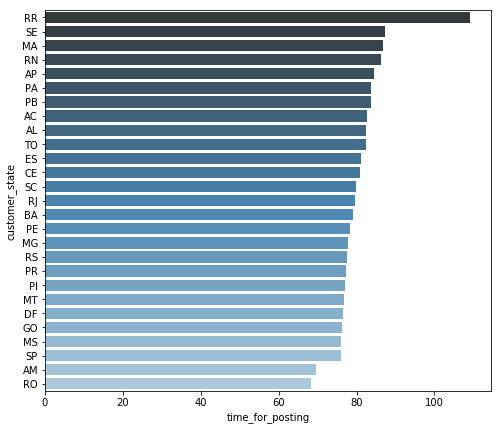

In [44]:
fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.barplot(x='time_for_posting', y='customer_state', data=df_g, palette='Blues_d')

### Tipo de Pagamento

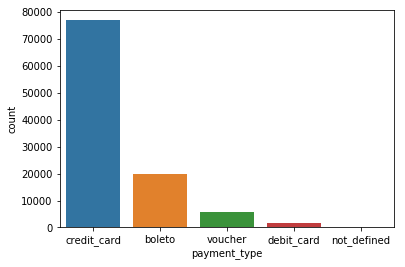

In [46]:
ax = sns.countplot(x='payment_type', data=df_payments)

### Quantidade de Parcelas

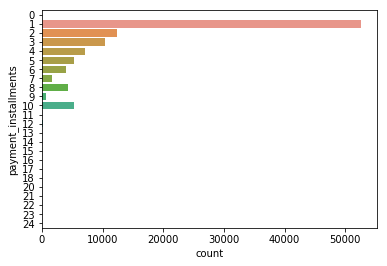

In [49]:
ax = sns.countplot(y='payment_installments', data=df_payments)

### Vendas em Cidades de SP

In [56]:
df_sp = df_customers.query('customer_state =="SP"')
len(df_sp['customer_city'].value_counts().index)

629

In [66]:
new_cols = list(df_geolocation.columns)
new_cols[0] = 'customer_zip_code_prefix'
df_geolocation.columns = new_cols

In [67]:
df_geolocation.head()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [68]:
df_custom_geolocation = df_customers.merge(df_geolocation, on='customer_zip_code_prefix'\
                                          , how='inner')

In [70]:
df_custom_geolocation.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP


In [76]:
import folium

ModuleNotFoundError: No module named 'folium'

In [77]:
import geopandas as gpd
from shapely.geometry import Point, Polygon